In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

import OrthogonalPolynomials
# Reloading the module
import importlib
importlib.reload(OrthogonalPolynomials)
from OrthogonalPolynomials import *

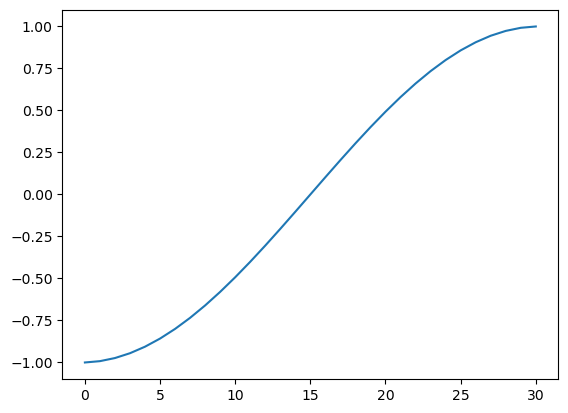

In [2]:
# Testing the Legendre Gauss Lobatto nodes
N=30
x_GLL = LegendreGaussLobattoNodes(N)
plt.plot(x_GLL)

In [3]:
# Testing the differentiation matrix
N = 4
x_cheb = ChebyshevGaussLobattoNodes(N)
w_bary = BarycentricWeights(x_cheb)
D_general = PolynomialDiffMatrix(x_cheb, w_bary)
D_cheb = ChebyshevDiffMatrix(x_cheb)
print("Cheb diff mat by the general method\n", D_general)
print("Cheb diff mat by the explicit formula\n", D_cheb)

Cheb diff mat by the general method
 [[ 5.50000000e+00 -6.82842712e+00  2.00000000e+00 -1.17157288e+00
   5.00000000e-01]
 [ 1.70710678e+00 -7.07106781e-01 -1.41421356e+00  7.07106781e-01
  -2.92893219e-01]
 [-5.00000000e-01  1.41421356e+00 -8.88178420e-16 -1.41421356e+00
   5.00000000e-01]
 [ 2.92893219e-01 -7.07106781e-01  1.41421356e+00  7.07106781e-01
  -1.70710678e+00]
 [-5.00000000e-01  1.17157288e+00 -2.00000000e+00  6.82842712e+00
  -5.50000000e+00]]
Cheb diff mat by the explicit formula
 [[ 5.50000000e+00 -6.82842712e+00  2.00000000e+00 -1.17157288e+00
   5.00000000e-01]
 [ 1.70710678e+00 -7.07106781e-01 -1.41421356e+00  7.07106781e-01
  -2.92893219e-01]
 [-5.00000000e-01  1.41421356e+00 -1.11022302e-16 -1.41421356e+00
   5.00000000e-01]
 [ 2.92893219e-01 -7.07106781e-01  1.41421356e+00  7.07106781e-01
  -1.70710678e+00]
 [-5.00000000e-01  1.17157288e+00 -2.00000000e+00  6.82842712e+00
  -5.50000000e+00]]


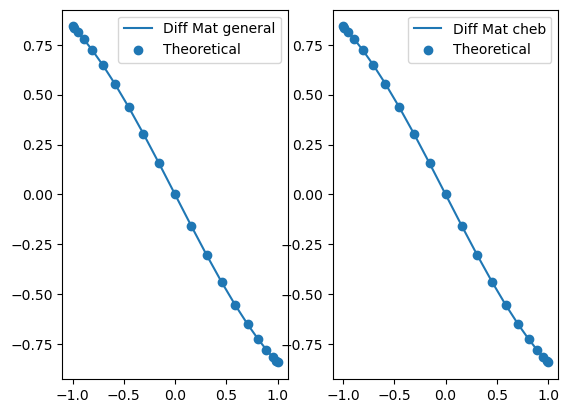

In [4]:
# Testing the differentiation matrix
def test_func(x):
    return np.cos(x)
def test_func_deri(x):
    return -np.sin(x)

N = 20
x_cheb = ChebyshevGaussLobattoNodes(N)
w_bary = BarycentricWeights(x_cheb)
D_general = PolynomialDiffMatrix(x_cheb, w_bary)
D_cheb = ChebyshevDiffMatrix(x_cheb)

f = test_func(x_cheb)
f_deri = test_func_deri(x_cheb)


f_deri_diffmat_general = np.dot(D_general,f)
f_deri_diffmat_cheb = np.dot(D_cheb,f)

fig = plt.figure()
ax = fig.add_subplot(121)
ax.plot(x_cheb, f_deri_diffmat_general, label='Diff Mat general')
ax.scatter(x_cheb, f_deri, label='Theoretical')
ax.legend()
ax = fig.add_subplot(122)
ax.plot(x_cheb, f_deri_diffmat_cheb, label='Diff Mat cheb')
ax.scatter(x_cheb, f_deri, label='Theoretical')
ax.legend()

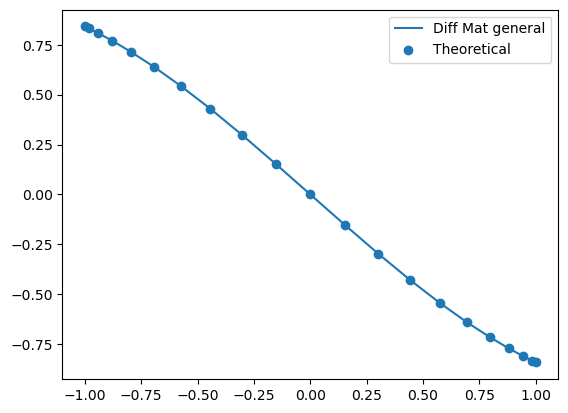

In [5]:
# Testing the differentiation matrix
def test_func(x):
    return np.cos(x)
def test_func_deri(x):
    return -np.sin(x)

N = 20
x_leg = LegendreGaussLobattoNodes(N)
w_bary = BarycentricWeights(x_leg)
D_general = PolynomialDiffMatrix(x_leg, w_bary)


f = test_func(x_leg)
f_deri = test_func_deri(x_leg)


f_deri_diffmat_general = np.dot(D_general,f)


fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x_leg, f_deri_diffmat_general, label='Diff Mat general')
ax.scatter(x_leg, f_deri, label='Theoretical')
ax.legend()


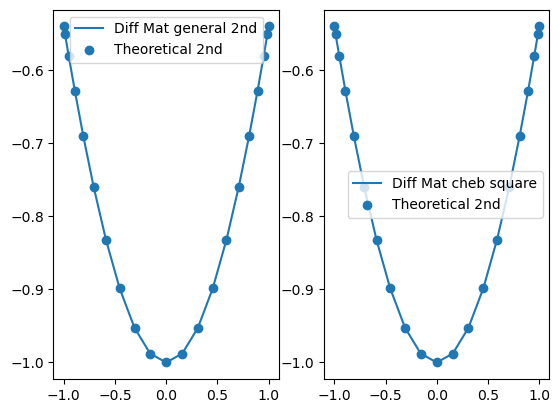

In [12]:
# Testing the high order differentiation matrix
def test_func(x):
    return np.cos(x)
def test_func_deri_2nd(x):
    return -np.cos(x)

N = 20
x_cheb = ChebyshevGaussLobattoNodes(N)
w_bary = BarycentricWeights(x_cheb)
D_general = PolynomialDiffMatrix(x_cheb, w_bary)
D_cheb = ChebyshevDiffMatrix(x_cheb)
D_general_2nd = PolynomialDiffMatrix_HighOrder(2, x_cheb, w_bary, D_cheb)


f = test_func(x_cheb)
f_deri_2nd = test_func_deri_2nd(x_cheb)


f_deri_2nd_diffmat_general = np.dot(D_general_2nd,f)
f_deri_2nd_diffmat_square = np.dot(np.matmul(D_cheb, D_cheb),f)

fig = plt.figure()
ax = fig.add_subplot(121)
ax.plot(x_cheb, f_deri_2nd_diffmat_general, label='Diff Mat general 2nd')
ax.scatter(x_cheb, f_deri_2nd, label='Theoretical 2nd')
ax.legend()
ax = fig.add_subplot(122)
ax.plot(x_cheb, f_deri_2nd_diffmat_square, label='Diff Mat cheb square')
ax.scatter(x_cheb, f_deri_2nd, label='Theoretical 2nd')
ax.legend()

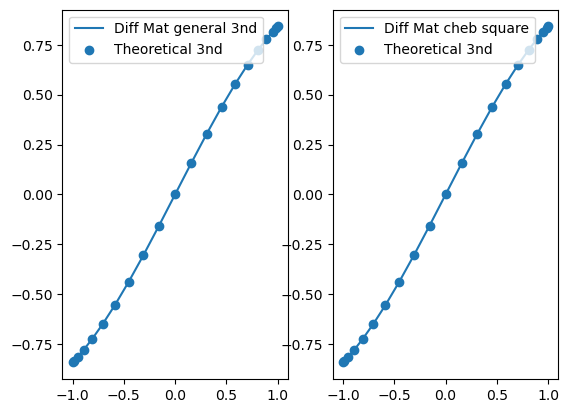

In [11]:
# Testing the high order differentiation matrix
def test_func(x):
    return np.cos(x)
def test_func_deri_3nd(x):
    return np.sin(x)

N = 20
x_cheb = ChebyshevGaussLobattoNodes(N)
w_bary = BarycentricWeights(x_cheb)
D_general = PolynomialDiffMatrix(x_cheb, w_bary)
D_cheb = ChebyshevDiffMatrix(x_cheb)
D_general_3nd = PolynomialDiffMatrix_HighOrder(3, x_cheb, w_bary, D_cheb)


f = test_func(x_cheb)
f_deri_3nd = test_func_deri_3nd(x_cheb)


f_deri_3nd_diffmat_general = np.dot(D_general_3nd,f)

f_deri_3nd_diffmat_square = np.dot(D_cheb,f)
f_deri_3nd_diffmat_square = np.dot(D_cheb,f_deri_3nd_diffmat_square)
f_deri_3nd_diffmat_square = np.dot(D_cheb,f_deri_3nd_diffmat_square)


fig = plt.figure()
ax = fig.add_subplot(121)
ax.plot(x_cheb, f_deri_3nd_diffmat_general, label='Diff Mat general 3nd')
ax.scatter(x_cheb, f_deri_3nd, label='Theoretical 3nd')
ax.legend()
ax = fig.add_subplot(122)
ax.plot(x_cheb, f_deri_3nd_diffmat_square, label='Diff Mat cheb square')
ax.scatter(x_cheb, f_deri_3nd, label='Theoretical 3nd')
ax.legend()

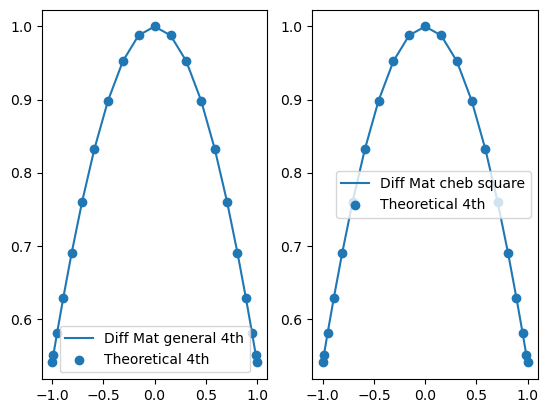

In [13]:
# Testing the high order differentiation matrix
def test_func(x):
    return np.cos(x)
def test_func_deri_4(x):
    return np.cos(x)

N = 20
x_cheb = ChebyshevGaussLobattoNodes(N)
w_bary = BarycentricWeights(x_cheb)
D_general = PolynomialDiffMatrix(x_cheb, w_bary)
D_cheb = ChebyshevDiffMatrix(x_cheb)
D_general_4 = PolynomialDiffMatrix_HighOrder(4, x_cheb, w_bary, D_cheb)


f = test_func(x_cheb)
f_deri_4 = test_func_deri_4(x_cheb)


f_deri_4_diffmat_general = np.dot(D_general_4,f)

f_deri_4_diffmat_square = np.dot(D_cheb,f)
f_deri_4_diffmat_square = np.dot(D_cheb,f_deri_4_diffmat_square)
f_deri_4_diffmat_square = np.dot(D_cheb,f_deri_4_diffmat_square)
f_deri_4_diffmat_square = np.dot(D_cheb,f_deri_4_diffmat_square)



fig = plt.figure()
ax = fig.add_subplot(121)
ax.plot(x_cheb, f_deri_4_diffmat_general, label='Diff Mat general 4th')
ax.scatter(x_cheb, f_deri_4, label='Theoretical 4th')
ax.legend()
ax = fig.add_subplot(122)
ax.plot(x_cheb, f_deri_4_diffmat_square, label='Diff Mat cheb square')
ax.scatter(x_cheb, f_deri_4, label='Theoretical 4th')
ax.legend()